###### This notebook is used to derive a consensus anatomical parcellation map from 3 biological replicates

In this notebook we compared two approaches to combining segmentation masks from multiple animals, majority vote and the Simultaneous Truth and Performance Level
Estimation [(STAPLE)](https://www.ncbi.nlm.nih.gov/pubmed/15250643) based on their implementations in [SimpleITK](https://github.com/SimpleITK/SimpleITK).

In [4]:
import SimpleITK as sitk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

###### Import segmentation masks (nrrd) from biological replicates (pre-aligned, affine transformed)

In [23]:
a=sitk.ReadImage('')
b=sitk.ReadImage('')
c=sitk.ReadImage('')

In [24]:
segmentations = [a,b,c]

###### Majority voting (does not solve ties)

In [25]:
labelForUndecidedPixels = 10
reference_segmentation_majority_vote = sitk.LabelVoting(segmentations, labelForUndecidedPixels)    

In [26]:
slice=sitk.GetArrayViewFromImage(reference_segmentation_majority_vote)

In [28]:
slice_2=np.where(slice==10, 0, slice)

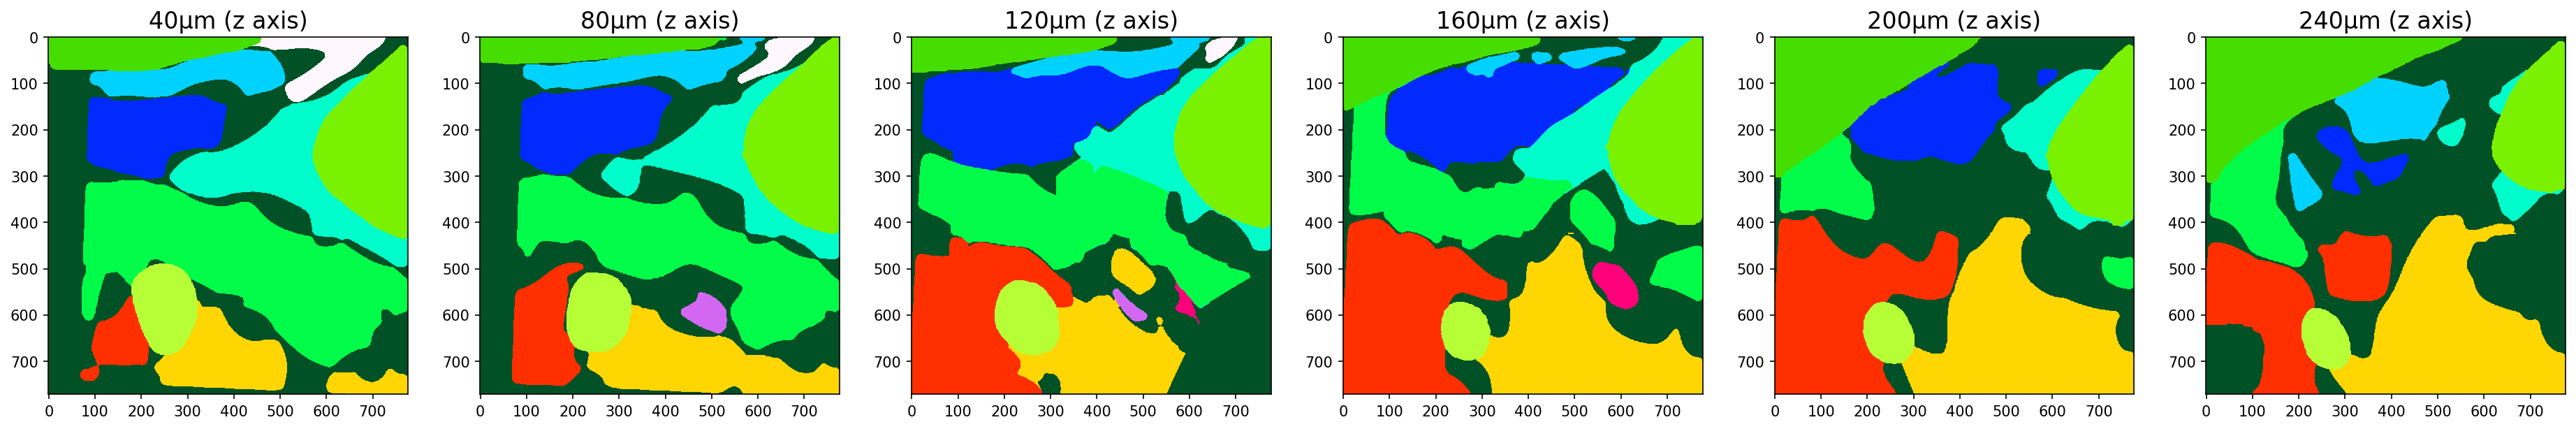

In [56]:
fig, ax = plt.subplots(1,6,figsize=(31,15),dpi=150)
ind=0
s=40
threshold=0
for z in [6,5,4,3,2,1]:
# plt.imshow(np.where(A==4,1,0)[z,:,:],'gray',origin='lower')
    ax[ind].imshow(img[z*s,:,:],cmap=plt.cm.gist_ncar,vmin=-1,vmax=16,alpha=1,interpolation='nearest')
    ax[ind].set_title(str(280-z*s)+'µm (z axis)',fontsize=16)
    ind+=1

###### STAPLE (probalistic and need to be thresholded)

In [ ]:
# Use the STAPLE algorithm to obtain the reference segmentation. 
ref={}
for i in [1,2,3,4]:
    foregroundValue = 1
    A=sitk.GetArrayViewFromImage(a)
    aa=sitk.GetImageFromArray(np.where(A==i,1,0))
    B=sitk.GetArrayViewFromImage(b)
    bb=sitk.GetImageFromArray(np.where(B==i,1,0))
    C=sitk.GetArrayViewFromImage(c)
    cc=sitk.GetImageFromArray(np.where(C==i,1,0))
    seg = [aa,bb,cc]
    reference_segmentation_STAPLE_probabilities = sitk.STAPLE(seg, foregroundValue) 
    ref[i]=sitk.GetArrayViewFromImage(reference_segmentation_STAPLE_probabilities)

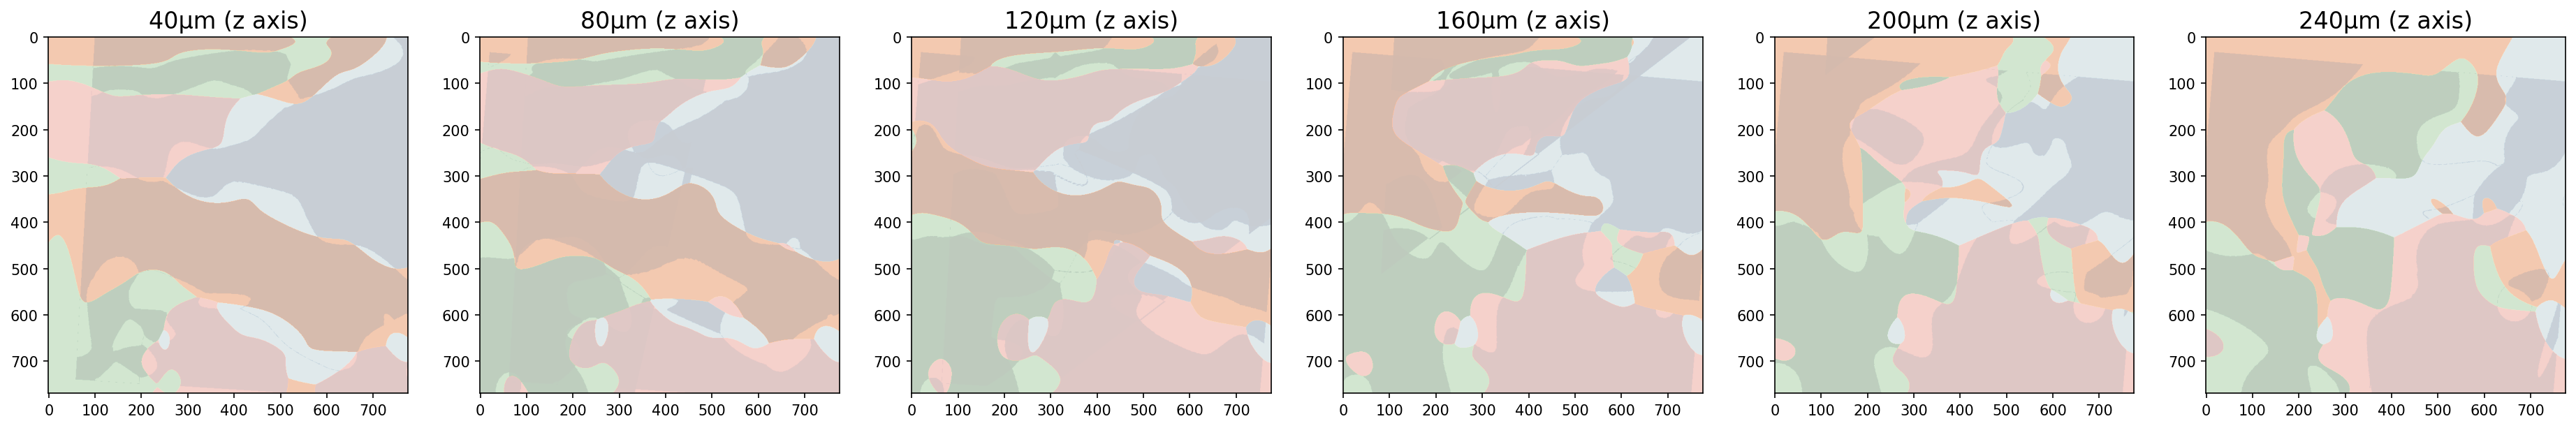

In [17]:
fig, ax = plt.subplots(1,6,figsize=(31,5),dpi=150)
ind=0
s=40
threshold=0.5
for z in range(1,7):
    ax[ind].imshow(ref[1][z*s,:,:],cmap=plt.cm.Reds,vmin=0,vmax=1,alpha=0.8)
    ax[ind].imshow(ref[2][z*s,:,:],cmap=plt.cm.Greens,vmin=0,vmax=1,alpha=0.5)
    ax[ind].imshow(ref[3][z*s,:,:],cmap=plt.cm.Blues,vmin=0,vmax=1,alpha=0.3)
    ax[ind].imshow(ref[4][z*s,:,:],cmap=plt.cm.Oranges,vmin=0,vmax=1,alpha=0.3)
    ax[ind].set_title(str(z*s)+'µm (z axis)',fontsize=16)
    ind+=1